In [2]:
import urllib.robotparser as rp
import requests
import re
from bs4 import BeautifulSoup  # for scraping
from pprint import pprint  # pretty printing
from itertools import chain


from textblob import TextBlob, Word
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet
import wikipedia

In [3]:
parser = rp.RobotFileParser()
def robot_checker(url, base, agent="*"):
    parser.set_url(base+"/robots.txt")
    parser.read()
    if parser.can_fetch(url, agent)==True:
        return requests.get(url)
    else:
        print("sorry, but you are not allowed to scrape this page.")

In [8]:
class ScrapeAll:
    def __init__(self, url):
        response = requests.get(url)
        self.url = url
        page = response.content
        self.page = BeautifulSoup(page, "html.parser")

    def hyperlinks(self):
        links = self.page.find_all("a")
        hyperlinks = []
        for i in links:
            h = i.get("href")
            if h is None:
                continue
            if h.startswith("http"):
                hyperlinks.append(h)
            else:
                hyperlinks.append(self.url + h)
        return hyperlinks

    def h_p(self):
        h = self.page.find_all(re.compile("h[1-6]|p"))
        head_par = [i.get_text() for i in h]
        return "\n".join(head_par)

    def get_tags(self, tag):
        return [i.get_text() for i in self.page.select(tag)]

In [18]:
class SuperList:
    def __init__(self, list):
        self.list = list

    def unlist(self):
        return list(chain.from_iterable(self.list))

    def merge(self):
        return " ".join([str(i) for i in self.list])

    def find(self, type):
        t = []
        for i in self.list:
            if type == "number" and str(i).isdigit():
                t.append(i)
            if type == "letter" and str(i).isalpha():
                t.append(i)
        return t


In [22]:
class Cleaner:
    def __init__(self, str):
        self.str = TextBlob(str)

    def get_words(self):
        return self.str.words

    def get_sentences(self):
        return self.str.sentences

    def lemmatize(self):
        return [w.lemmatize() for w in self.str.words]

    def clean_stopwords(self):
        sw = stopwords.words("english")
        return [i for i in self.str.words if i not in sw]

    def uppercase(self):
        return [w.upper() for w in self.str.words]

    def lowercase(self):
        return [w.lower() for w in self.str.words]

    def freq_dist(self):
        nltk.FreqDist(self.clean_stopwords()).plot(50, cumulative=True)


In [32]:
py = wikipedia.page("Python programming language")

In [36]:
s = ScrapeAll(py.url)
pprint(s.hyperlinks())

['https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Wikipedia:Good_articles',
 'https://en.wikipedia.org/wiki/Python_(programming_language)#mw-head',
 'https://en.wikipedia.org/wiki/Python_(programming_language)#p-search',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/File:Python_logo_and_wordmark.svg',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Programming_paradigm',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Object-oriented_programming',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Imperative_programming',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Functional_programming',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Procedural_programming',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Reflective_programming',
 'https://en.wikipedia.org/wiki/Python_(programming_language)/wiki/Software_design',
 'https://en.wikipe

In [37]:
pprint(s.get_tags("ol.references > li"))

['^ a b Guttag, John V. (2016-08-12). Introduction to Computation and '
 'Programming Using Python: With Application to Understanding Data. MIT Press. '
 'ISBN\xa0978-0-262-52962-4.\xa0\n',
 '^ Deily, Ned (28 March 2018). "Python 3.7.0 is now available". Python '
 'Insider. The Python Core Developers. Retrieved 29 March 2018.\xa0\n',
 '^ Peterson, Benjamin (1 May 2018). "Python 2.7.15 released". Python Insider. '
 'The Python Core Developers. Retrieved 1 May 2018.\xa0\n',
 '^ "PEP 483 -- The Theory of Type Hints". Python.org.\xa0\n',
 '^ File extension .pyo was removed in Python 3.5. See PEP 0488\n',
 '^ Holth, Moore (30 March 2014). "PEP 0441 -- Improving Python ZIP '
 'Application Support". Retrieved 12 November 2015.\xa0\n',
 '^ a b "Why was Python created in the first place?". General Python FAQ. '
 'Python Software Foundation. Retrieved 22 March 2007.\xa0\n',
 '^ Kuchling, Andrew M. (22 December 2006). "Interview with Guido van Rossum '
 '(July 1998)". amk.ca. Archived from the or

In [41]:
pprint(s.h_p())

('document.documentElement.className = '
 'document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, '
 '"$1client-js$2" );\n'
 '(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python '
 '(programming '
 'language)","wgCurRevisionId":854281242,"wgRevisionId":854281242,"wgArticleId":23862,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 '
 'errors: external links","All articles with unsourced statements","Articles '
 'with unsourced statements from October 2017","Wikipedia articles needing '
 'clarification from May 2018","Articles with unsourced statements from May '
 '2018","Articles containing potentially dated statements from March '
 '2018","All articles containing potentially dated statements","Articles '
 'containing potentially dated statements from

 'retrieved 14 August 2011\xa0\n'
 ', retrieved 14 August 2011\n'
 '14 August\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 '"round", The Python standard library, release 3.2, §2: Built-in functions, '
 'retrieved 14 August 2011\xa0\n'
 ', retrieved 14 August 2011\n'
 '14 August\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 'Beazley, David M. (2009). Python Essential Reference (4th ed.). p.\xa0'
 '66.\xa0\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 'Kernighan, Brian W.; Ritchie, Dennis M. (1988). The C Programming Language '
 '(2nd ed.). p.\xa0206.\xa0\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 '"Built-in Type". docs.python.org.\xa0\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 'Batista, Facundo. "PEP 0327 -- Decimal Data Type". Python.org. Retrieved 26 '
 'September 2015.\xa0\n'
 '. Retrieved 26 September 2015\n'
 '26 September\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 '"What\'s New in Python 2.6 — Python v2.6.9 documentation". docs.python.org. '
 'Retrieved 26 September 2015.\xa0\n'
 '. Retrieved 26 September 2015\n'
 '26 September\n'
 '\xa0\n'
 '\xa0\n'
 '^\n'
 

In [43]:
sl = SuperList(wikipedia.search("python"))
pprint(sl.merge())

('Python Python (programming language) Monty Python PYTHON Pythonidae Burmese '
 'python Reticulated python List of Python software Python molurus Colt Python')


In [44]:
pprint(wikipedia.summary("Facebook", sentences=10))


('Facebook is an American online social media and social networking service '
 'company based in Menlo Park, California. Its website was launched on '
 'February 4, 2004, by Mark Zuckerberg, along with fellow Harvard College '
 'students and roommates Eduardo Saverin, Andrew McCollum, Dustin Moskovitz, '
 'and Chris Hughes.\n'
 "The founders initially limited the website's membership to Harvard students. "
 'Later they expanded it to higher education institutions in the Boston area, '
 'the Ivy League schools, and Stanford University. Facebook gradually added '
 'support for students at various other universities, and eventually to high '
 'school students. Since 2006, anyone who claims to be at least 13 years old '
 'has been allowed to become a registered user of Facebook, though variations '
 'exist in this requirement, depending on local laws. The name comes from the '
 'face book directories often given to American university students. Facebook '
 'held its initial public offering

In [45]:
pprint(wikipedia.search("python"))

['Python',
 'Python (programming language)',
 'Monty Python',
 'PYTHON',
 'Pythonidae',
 'Burmese python',
 'Reticulated python',
 'List of Python software',
 'Python molurus',
 'Colt Python']


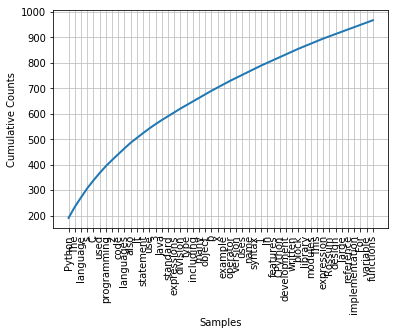

None


In [47]:
c = Cleaner(py.content)
pprint(c.freq_dist())